# Workflow for processing Dharawal Multi-Timeline - 15JUL18 - Landsat 8

In [46]:
import numpy as np
import sys
sys.path.append("..")

import time
start_time = time.time()

#
# Set up input and output directories
#
indir = '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Dharawal/15JUL18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/DHA-MultiTimeLine/'

#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name', 'Panel origin', 'Reflectance/Radiance'.
# and 'Radiance'/'Reflectance'.
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
field_data = ['DHA', '15JUL18', '', 'Landsat8', 'UOW_Panel', 'Radiance']

#
# bad_pans    contains the names of individual panels readings that appear to be bogus
# bad_grounds contains ground-reading file names that appear to be bogus
# Use empty lists if there are no bad spectra.
#
bad_grounds = []
bad_pans = []

ls8_bad_days = ['2013-04-11', '2013-04-18', '2013-06-05', '2013-07-16', '2013-07-23',
                '2013-08-08', '2013-10-04', '2013-10-27', '2013-11-12', '2013-11-21',
                '2013-11-28', '2013-12-14', '2013-12-30', '2014-01-24', '2014-01-31',
                '2014-02-09', '2014-02-16', '2014-02-25', '2014-03-04', '2014-03-13',
                '2014-03-20', '2014-03-29', '2014-04-05', '2014-04-14', '2014-04-21',
                '2014-06-01', '2014-06-08', '2014-07-19', '2014-08-11', '2014-08-20',
                '2014-08-27', '2014-09-05', '2014-09-12', '2014-09-21', '2014-10-07',
                '2014-10-14', '2014-10-23', '2014-11-24', '2014-12-10', '2014-12-17',
                '2014-12-26', '2015-01-02', '2015-01-11', '2015-01-18', '2015-01-27',
                '2015-02-03', '2015-02-12', '2015-02-19', '2015-03-07', '2015-03-16',
                '2015-03-23', '2015-04-01', '2015-04-08', '2015-04-17', '2015-05-03',
                '2015-05-10', '2015-05-26', '2015-06-04', '2015-06-11', '2015-06-20',
                '2015-07-06', '2015-07-22', '2015-07-29', '2015-08-14', '2015-08-23',
                '2015-09-24', '2015-10-01', '2015-10-10', '2015-10-17', '2015-10-26',
                '2015-11-02', '2015-11-11', '2015-11-27', '2015-12-20', '2016-01-05',
                '2016-01-14', '2016-01-21', '2016-02-06', '2016-02-15', '2016-03-09',
                '2016-03-25', '2016-04-03', '2016-04-19', '2016-05-05', '2016-06-06',
                '2016-06-22', '2016-07-08', '2016-07-24', '2016-07-31', '2016-09-01',
                '2016-09-17', '2016-09-26', '2016-10-12', '2016-10-19', '2016-10-28',
                '2016-11-13', '2016-11-20', '2016-11-29', '2016-12-06', '2016-12-15',
                '2016-12-22', '2016-12-31', '2017-01-07', '2017-01-23', '2017-02-01',
                '2017-02-08', '2017-02-17', '2017-02-24', '2017-03-05', '2017-03-12',
                '2017-03-21', '2017-03-28', '2017-04-06', '2017-06-09', '2017-06-16',
                '2017-07-02', '2017-07-11', '2017-08-28', '2017-09-29', '2017-10-06',
                '2017-10-15', '2017-10-22', '2017-10-31', '2017-11-07', '2017-11-16',
                '2017-12-02', '2017-12-09', '2017-12-18', '2017-12-25', '2018-01-03',
                '2018-01-10', '2018-01-26', '2018-02-04', '2018-02-11', '2018-02-20',
                '2018-03-08', '2018-03-15', '2018-04-09', '2018-04-16', '2018-04-25',
                '2018-05-11', '2018-05-18', '2018-06-03', '2018-06-19', '2018-07-30',
                '2018-08-06', '2018-08-15', '2018-08-22', '2018-09-07', '2018-09-16',
                '2018-09-23', '2018-10-02', '2018-10-09' ,'2018-10-25', '2018-11-03',
                '2018-11-26', '2018-12-05', '2018-12-12', '2018-12-21', '2019-01-06',
                '2019-01-13']
s2a_bad_days = ['2015-10-23', '2016-01-31', '2016-06-09', '2016-07-19', '2016-08-08',
                '2016-09-17', '2016-10-27', '2016-11-26', '2016-12-06', '2017-01-05',
                '2017-01-15', '2017-02-14', '2017-02-24', '2017-03-16', '2017-04-05',
                '2017-04-25', '2017-05-15', '2017-06-04', '2017-06-24', '2017-07-14',
                '2017-09-12', '2017-10-02', '2017-10-22', '2017-11-11', '2017-12-21',
                '2018-01-10', '2018-02-09', '2018-02-19', '2018-03-01', '2018-03-21',
                '2018-03-31', '2018-04-10', '2018-05-30', '2018-06-09', '2018-06-19',
                '2018-07-09', '2018-08-08', '2018-08-28', '2018-09-17', '2018-10-07',
                '2018-10-17', '2018-11-06', '2018-11-16', '2018-11-26', '2018-12-06']
s2b_bad_days = ['2017-09-27', '2017-10-17', '2017-10-27', '2017-11-06', '2017-11-16',
                '2017-12-06', '2017-12-26', '2018-01-15', '2018-01-25', '2018-02-04',
                '2018-02-24', '2018-03-06', '2018-03-16', '2018-04-15', '2018-05-15',
                '2018-05-25', '2018-06-04', '2018-07-04', '2018-09-02', '2018-10-12',
                '2018-10-22', '2018-12-11', '2018-12-21']

ls8_csvs = ['DHA_15JUL18__Landsat8.csv']
sent_csvs = ['DHA_15JUL18__Sentinel2.csv']

rain_dat = '../Weather/IDCJAC0009_068024_1800_Data.csv'

#
# Define the first line and spectrum number for all/good panels and grounds
#
firstGoodLine = 1
firstGoodPanelSpec = 0
firstGoodGroundSpec = 10

#
# Calculated BRDF data
#
brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 0.022350000000000002, 0.0034700000000000004, 0.004633333333333334],
                          ['band11', 0.15355333333333335, 0.056920000000000005, 0.021423333333333332],
                          ['band12', 0.07223333333333334, 0.02232666666666667, 0.013796666666666667],
                          ['band2', 0.022350000000000002, 0.0034700000000000004, 0.004633333333333334],
                          ['band3', 0.052623333333333334, 0.015916666666666666, 0.011903333333333333],
                          ['band4', 0.04673, 0.013106666666666668, 0.009803333333333334],
                          ['band5', 0.04673, 0.013106666666666668, 0.009803333333333334],
                          ['band6', 0.04673, 0.013106666666666668, 0.009803333333333334],
                          ['band7', 0.23625666666666667, 0.21835000000000002, 0.012826666666666669],
                          ['band8', 0.23625666666666667, 0.21835000000000002, 0.012826666666666669],
                          ['band8a', 0.23625666666666667, 0.21835000000000002, 0.012826666666666669],
                         ])

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 1.0, 0.0, 1.0]

#
# Define corners of field data, if GPS coordinates are NOT written into headers.
# Order is SE, SW, NE, NW. Units are decimal degrees.
# If there are no coordinates, then set RockWalk to either True or False.
# True  means that the field site was walked in a rock-like pattern (alternating directions),
# False means that the field site was walked in a roll-like pattern (same direction)
#
Corners = [-34.254651, 150.927252, -34.254504, 150.926101, -34.253489, 150.927328, -34.253418, 150.926149]
RockWalk = True
StartCorner = 'SE'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
#######################################
# LINES BELOW SHOULD REMAIN UNCHANGED #
#######################################
#
# panel_dir and in_panel refer to the file that is used in determining the k-factor,
# so this should remain unchanged.
#
if field_data[5] == 'Radiance':
    suffix = 'asd.rad.txt'
else: 
    suffix = 'asd.txt'

panel_dir =  '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Panels/'

if field_data[4] == 'GA_Panel':
    in_panel = 'ga_panel1_jan_2018.txt'
elif field_data[4] == 'CSIRO_Panel':
    in_panel = 'csiro_panel.txt'
elif field_data[4] == 'UA_Panel':
    in_panel = 'ua_panel.txt'
elif field_data[4] == 'UOW_Panel':
    in_panel = 'uow_panel.txt'
elif field_data[4] == 'UQ_Panel':
    in_panel = 'uq_panel.txt'
elif field_data[4] == 'CSIRO_VIC_Panel':
    in_panel = 'csiro_vic_panel.txt'
else:
    nopanel = '***PANEL NAME NOT KNOWN***'
    print(nopanel)

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})

f_name = sat_resp[field_data[3]]

#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1



### Define 'alldata' as the dataframe that contains all the raw spectra.
Show the first wavelength of every spectrum, so that the data integrity can be checked.

In [4]:
alldata = LoadData.load_from_dir(indir, suffix, firstGoodLine, Corners)

alldata[alldata['Wavelength']==350]

Wavelength  radiance               filename          date_saved  \
0          350  0.054259  2018071500000.asd.rad 2018-07-14 00:33:22   
0          350  0.054451  2018071500001.asd.rad 2018-07-14 00:33:24   
0          350  0.054724  2018071500002.asd.rad 2018-07-14 00:33:27   
0          350  0.054562  2018071500003.asd.rad 2018-07-14 00:33:30   
0          350  0.054357  2018071500004.asd.rad 2018-07-14 00:33:33   
0          350  0.054194  2018071500005.asd.rad 2018-07-14 00:33:35   
0          350  0.053308  2018071500006.asd.rad 2018-07-14 00:33:38   
0          350  0.053968  2018071500007.asd.rad 2018-07-14 00:33:40   
0          350  0.054042  2018071500008.asd.rad 2018-07-14 00:33:43   
0          350  0.054734  2018071500009.asd.rad 2018-07-14 00:33:46   
0          350  0.000641  2018071500010.asd.rad 2018-07-14 00:34:02   
0          350  0.001033  2018071500011.asd.rad 2018-07-14 00:34:05   
0          350  0.001508  2018071500012.asd.rad 2018-07-14 00:34:07   
0          350  0.000855  2018071500013.asd.rad 2018-07-14 00:34:10   
0          350  0.000781  2018071500014.asd.rad 2018-07-14 00:34:13   
0          350  0.000995  2018071500015.asd.rad 2018-07-14 00:34:16   
0          350  0.000849  2018071500016.asd.rad 2018-07-14 00:34:18   
0          350  0.000887  2018071500017.asd.rad 2018-07-14 00:34:21   
0          350  0.000914  2018071500018.asd.rad 2018-07-14 00:34:24   
0          350  0.001038  2018071500019.asd.rad 2018-07-14 00:34:26   
0          350  0.000609  2018071500020.asd.rad 2018-07-14 00:34:58   
0          350  0.000691  2018071500021.asd.rad 2018-07-14 00:35:01   
0          350  0.000771  2018071500022.asd.rad 2018-07-14 00:35:03   
0          350  0.001159  2018071500023.asd.rad 2018-07-14 00:35:06   
0          350  0.000743  2018071500024.asd.rad 2018-07-14 00:35:09   
0          350  0.000684  2018071500025.asd.rad 2018-07-14 00:35:11   
0          350  0.000756  2018071500026.asd.rad 2018-07-14 00:35:14   
0          350  0.000678  2018071500027.asd.rad 2018-07-14 00:35:17   
0          350  0.000603  2018071500028.asd.rad 2018-07-14 00:35:20   
0          350  0.001080  2018071500029.asd.rad 2018-07-14 00:35:22   
..         ...       ...                    ...                 ...   
0          350  0.000581  2018071500308.asd.rad 2018-07-14 01:07:20   
0          350  0.000606  2018071500309.asd.rad 2018-07-14 01:07:23   
0          350  0.000794  2018071500311.asd.rad 2018-07-14 01:07:31   
0          350  0.000823  2018071500312.asd.rad 2018-07-14 01:07:34   
0          350  0.000778  2018071500313.asd.rad 2018-07-14 01:07:37   
0          350  0.000632  2018071500314.asd.rad 2018-07-14 01:07:39   
0          350  0.000870  2018071500315.asd.rad 2018-07-14 01:07:42   
0          350  0.000942  2018071500316.asd.rad 2018-07-14 01:07:45   
0          350  0.000778  2018071500317.asd.rad 2018-07-14 01:07:47   
0          350  0.000710  2018071500318.asd.rad 2018-07-14 01:07:50   
0          350  0.000870  2018071500319.asd.rad 2018-07-14 01:07:52   
0          350  0.000879  2018071500321.asd.rad 2018-07-14 01:08:01   
0          350  0.000731  2018071500322.asd.rad 2018-07-14 01:08:03   
0          350  0.000696  2018071500323.asd.rad 2018-07-14 01:08:06   
0          350  0.000809  2018071500324.asd.rad 2018-07-14 01:08:08   
0          350  0.000890  2018071500325.asd.rad 2018-07-14 01:08:11   
0          350  0.000659  2018071500326.asd.rad 2018-07-14 01:08:14   
0          350  0.000984  2018071500327.asd.rad 2018-07-14 01:08:16   
0          350  0.000812  2018071500328.asd.rad 2018-07-14 01:08:19   
0          350  0.000932  2018071500329.asd.rad 2018-07-14 01:08:21   
0          350  0.000960  2018071500330.asd.rad 2018-07-14 01:08:27   
0          350  0.001031  2018071500331.asd.rad 2018-07-14 01:08:29   
0          350  0.000638  2018071500332.asd.rad 2018-07-14 01:08:32   
0          350  0.000751  2018071500333.asd.rad 2018-07-14 01:08:35   
0          350  0.000933  20

### Print out time stamp and coordinate extent for BRDF correction

The time stamp and Lat/Long extents are required to calculate the BRDF correction, used below.

In order to calculate the BRF correction, the following method is used:

<OL>
    <LI>Run the print statements in the cell below.</LI>
    <LI>Copy and paste the output into a VDI terminal window</LI>
    <LI>Copy and paste the resultant VDI output into the BRDF calculation cell, writing over the similar text.</LI>
</OL>

NOTE: This works assuming that the BRDF code is in the current directory.


In [5]:
PrintBRDF.print_brdf(alldata, field_data)

#################################################################################
# Copy and paste the following into a terminal window on VDI for Landsat 8 data #
#################################################################################

source module.sh
sed -i "34s/.*/        setattr(self, 'acquisition_datetime', dateutil.parser.parse('2018-07-14 00:33:22'))/" retrieve_brdf.py
sed -i "37s/.*/        bbox = geopandas.GeoDataFrame({'geometry': [box(150.927252, -34.254651, 150.927252, -34.254651)]})/" retrieve_brdf.py
python retrieve_brdf.py > temp.txt ; awk -f format_Sent.awk temp.txt



### Specify which spectra are panels/ground/good/bad

 Determine panel file names by assuming that all panels have a data value of at least 0.06
 in the first wavelength (350nm). Call this dataframe 'panel_names'.

 good_panels = all panel data with bad panels removed<BR>
 bad_panels  = all bad panel data<BR>
 all_panels = both good and bad panel data<BR>
 good_grounds = good ground readings<BR>
 all_grounds = all ground data.<P>
 Any bad ground data (bad_grounds) is defined in the 2nd cell.


In [6]:
panel_names, all_panels, good_panels, bad_panels, good_grounds, all_grounds = ExtractPanelsGrounds.extract_panels_grounds(alldata, bad_pans, bad_grounds, field_data)

### Create dataframes for all/good/bad panel spectra.

For the bad panel spectra dataframe, first check to see if bad panels have been defined.<BR>
If not, then don't create anything.

In [7]:
all_panel_spec = MakeSpecDF.make_spec_df(all_panels, field_data)
good_panel_spec = MakeSpecDF.make_spec_df(good_panels, field_data)
try:
    bad_panel_spec = MakeSpecDF.make_spec_df(bad_panels, field_data)
except UnboundLocalError:
    pass

# Figure 

### Plot panel radiances for all/good/bad panels

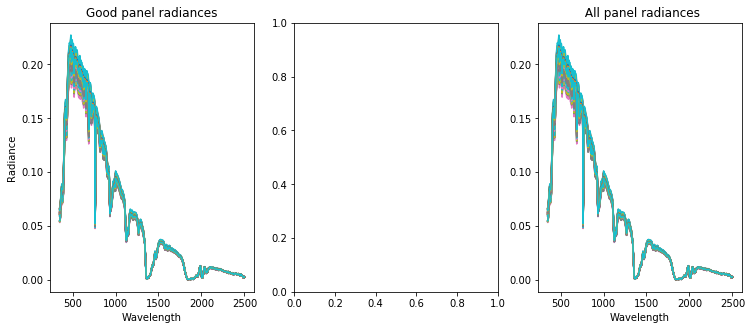

In [8]:
try:
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)
except NameError:
    bad_panel_spec = [0,0]
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)

fignum += 1

# Figure 

### Diagnosis plots of bad panel spectra

In [9]:
good_panel_mean = good_panel_spec.mean(axis=1)

try:
    FIG_BadPanelAnalysis.FIG_bad_panel_analysis(good_panel_mean, good_panel_spec, bad_panel_spec, output, field_data, fignum)
except AttributeError:
    pass
fignum +=1

### Create spectral dataframes for all ground spectra and good ground spectra

In [10]:
all_grounds_spec = MakeSpecDF.make_spec_df(all_grounds, field_data)
good_grounds_spec = MakeSpecDF.make_spec_df(good_grounds, field_data)

# Figure 

### Plot ground spectra (all and good), normalised to the median good spectrum

These plots are used to identify any ground spectra that are bogus.

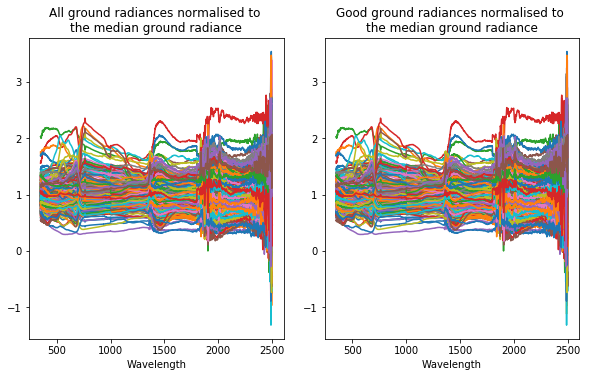

In [11]:
FIG_GroundSpectra.FIG_ground_spectra(good_grounds_spec, all_grounds_spec, output, field_data, fignum)
fignum +=1

### Create time-relative dataframes

gpt = good panels<BR>
gpta = all panels<BR>
adt = good grounds<BR>
adta = all grounds

In [12]:
gpt, gpta, adt, adta = CreateTimeRelativeDF.create_time_relative_dfs(good_panels, all_panels, good_grounds, all_grounds)

# Figure 

### Plot timelines for ALL panel and ground data, with one line in one panel

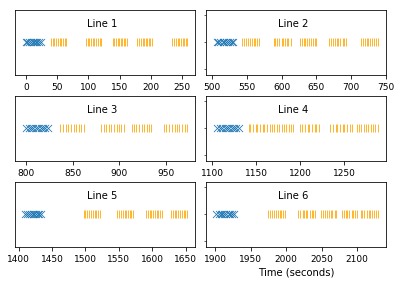

In [13]:
FIG_AllTimelines.FIG_all_timelines(gpta, adta, output, field_data, fignum)
fignum += 1

# Figure 

### Plot timelines for GOOD panel and ground data, with one line in one panel

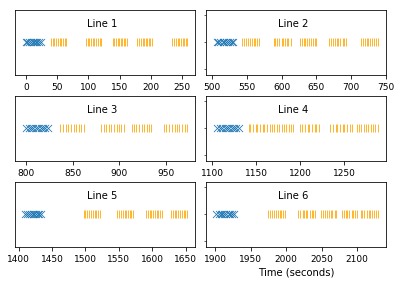

In [14]:
from CalVal.FIG_AllTimelines import panel_plot_layout, multi_timeline_plot

FIG_GoodTimelines.FIG_good_timelines(gpta, gpt, adt, panel_plot_layout, multi_timeline_plot, output, field_data, fignum)
fignum += 1

# Figure 

### Create timeline plot of averaged, normalised all/good panels

These plots are used to identify any panels that show unusually bright or dark readings,<BR>
    which can be weeded out as bad panels.
    
The general shape of the curve should follow "insolation" - the changing of incident light
due to the Sun rising/falling in the sky.

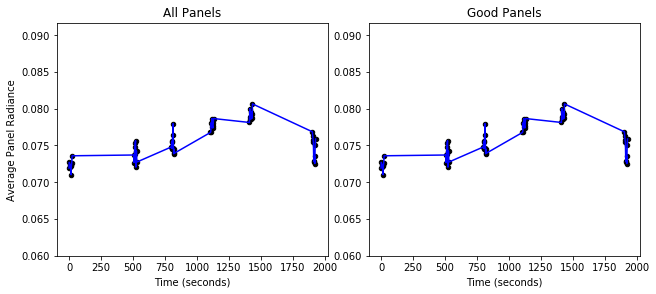

In [15]:
gpt, gpta = FIG_NormalisedPanelsTimeline.normalise_spectra(good_panel_mean, good_panel_spec, all_panel_spec, gpt, gpta, field_data)
    
FIG_NormalisedPanelsTimeline.FIG_normalised_panels_timeline(gpt, gpta, output, field_data, fignum)
fignum += 1

### Define the K-factor

This reads a standard file with a response curve for the detector, given an ideally white surface.<BR>
Then "k_f" is defined for the K-factor.

In [16]:
k_f = KFactor.k_factor(panel_dir, in_panel)

### Rename the first spectrum in ALL/GOOD panels to the correct name

Rather than just "radiance", it will be named something like radiance1-0<BR>
for the zeroth spectrum in the first line, for example.    

In [17]:
SpecRename.spec_rename(good_panel_spec, good_grounds_spec, firstGoodLine, firstGoodPanelSpec, firstGoodGroundSpec, field_data)

### Create dataframe with Reflectances

In [18]:
all_refls = CreateReflectances.create_reflectances(good_panels, good_panel_spec, good_grounds_spec, k_f, field_data)

### Test for reflectances
Test field_data to see if the data were saved as reflectances. If so, bypass all the panelling workflow.

In [19]:
if field_data[5] == 'Reflectance':
    all_refls = good_grounds_spec

# Figure 

### Plot all ground reflectances in black, plus the Line-averaged reflectances in colour

The Line-averaged reflectances are shown in order to identify any outlying lines that<BR>

might have been caused by bad panel spectra (for example).

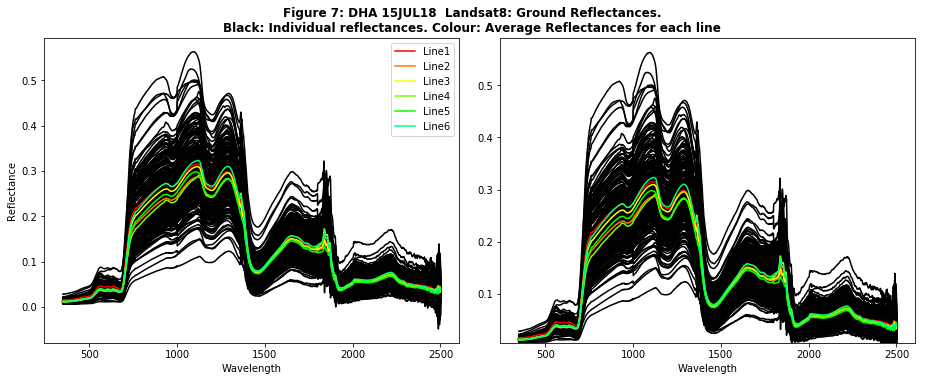

In [20]:
FIG_Reflectances.FIG_reflectances(good_panels, all_refls, colpac, output, field_data, fignum)
fignum += 1

### Apply weighted band responses to all reflectances

In [21]:
f_name = sat_resp['Landsat8']
result_ls8_df, dummy, band_ls8, dummy2 = ApplyWeights.apply_weights(f_name, all_refls, sat_resp, field_data)
f_name = sat_resp['Sentinel2a']
dummy, result_s2a_df, dummy2, band_s2a = ApplyWeights.apply_weights(f_name, all_refls, sat_resp, field_data)
f_name = sat_resp['Sentinel2b']
dummy, result_s2b_df, dummy2, band_s2b = ApplyWeights.apply_weights(f_name, all_refls, sat_resp, field_data)

### Reformat band reflectances and apply to dataframe "ground_bands"

In [22]:
ground_bands_ls8 = ReformatDF.reformat_df(good_grounds, result_ls8_df)
ground_bands_s2a = ReformatDF.reformat_df(good_grounds, result_s2a_df)
ground_bands_s2b = ReformatDF.reformat_df(good_grounds, result_s2b_df)

# Figure 

### Plot band reflectances

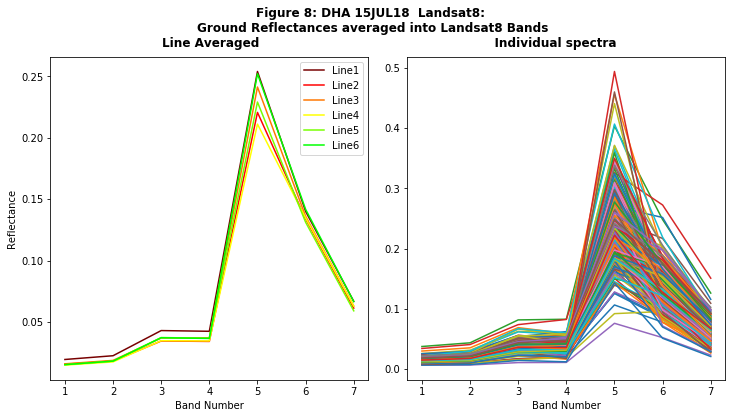

In [23]:
FIG_BandReflectances.FIG_band_reflectances(ground_bands_ls8, result_ls8_df, band_ls8, ground_bands_s2a, result_s2a_df, band_s2a, colpac, output, field_data, fignum)
fignum += 1
#FIG_BandReflectances.FIG_band_reflectances(ground_bands_s2a, result_s2a_df, band_s2a, colpac, output, field_data, fignum)
#fignum += 1

# Figure

### Histogram of all good spectra, plotted band-by-band

This can be used to identify outlying ground spectra that can be added to bad_grounds in the second cell.

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

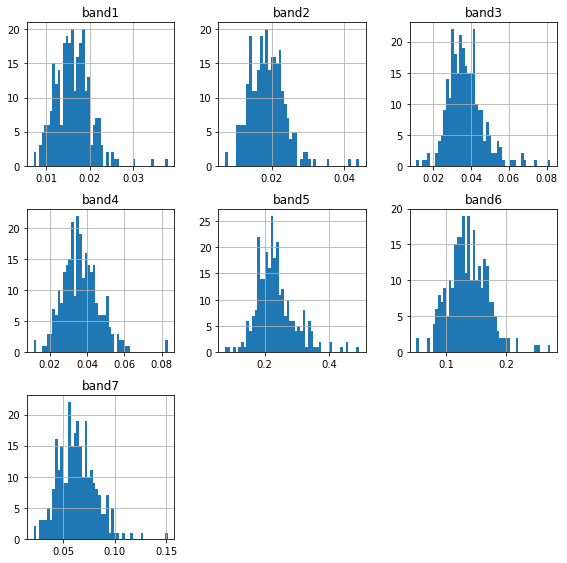

In [24]:
FIG_SpecHistogram.FIG_spec_histogram(ground_bands_ls8, ground_bands_s2b, output, field_data, fignum)
fignum += 1

### Outlying ground spectra

Display the spectra with maximum and minimum values. These can be compared to the histograms above<BR>
    to identify any outlying spectra that need to be identified as bad ground spectra.

In [25]:
maxfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
maxbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
minfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]
minbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]

print("Maximum value found in:", maxfile.iloc[0], '\n', maxbands.iloc[0], '\nMinimum value found in:', minfile.iloc[0], '\n', minbands.iloc[0])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].max())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].max())])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].min())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].min())])


Maximum value found in: 2018071500012.asd.rad 
 band1     0.037868
band2     0.046319
band3     0.084480
band4     0.080857
band5     0.161011
band6     0.325548
band7     0.361711
band8     0.387453
band8a    0.403757
band11    0.251069
band12    0.127976
Name: 2, dtype: float64 
Minimum value found in: 2018071500104.asd.rad 
 band1     0.007035
band2     0.007404
band3     0.011526
band4     0.011380
band5     0.023271
band6     0.052020
band7     0.062338
band8     0.070946
band8a    0.076395
band11    0.053378
band12    0.023927
Name: 84, dtype: float64


### Determine Solar angle

Based on the spectrum Latitude, Longitude and time stamp, calculate the angle of<BR>
the Sun, with respect to the zenith. Append this number to the "ground_bands" dataframe.

In [26]:
def solar_angle(row):

    loc = coord.EarthLocation(lon=row['Longitude'] * u.deg,
                              lat=row['Latitude'] * u.deg)
    #timy0 = timei.to_pydatetime()
    timy = Time(row['date_saved'], format='datetime')
    
    altaz = coord.AltAz(location=loc, obstime=timy)
    sun = coord.get_sun(timy)

    return sun.transform_to(altaz).zen.degree

ground_bands_ls8['Solar_angle'] = ground_bands_ls8.apply(solar_angle, axis=1)
ground_bands_s2a['Solar_angle'] = ground_bands_s2a.apply(solar_angle, axis=1)
ground_bands_s2b['Solar_angle'] = ground_bands_s2b.apply(solar_angle, axis=1)

### BRDF Calculation

The following script is adapted from FORTRAN code that will calculate the adjusted ASD measurement to 45$^\circ$. This is derived from "MODIS BRDF / Albedo Product: Algorithm Theoretical basis Docuement Version 5.0" by Strahler et al. (1999).

What follows is a key to the variables used in this code, compared to the variables and equations in the document:

hb and br = h/b and b/r . . . . . . . . . . . . . . . crown shape parameters, respectively.<BR>
RL_brdf = R($\theta, \vartheta, \phi, \Lambda$). . . . . . . . . . . . . . (37)<BR>
solar = $\theta$ . . . . . . . . . . . . . . . . . . . . . . . . . . solar zenith angle<BR>
view = $\xi$ . . . . . . . . . . . . . . . . . . . . . . . . . . .view zenith angle<BR>
ra = $\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . view-sun relative azimuth angle<BR>
cosxi = cos $\xi^\prime$ . . . . . . . . . . . . . . . . . . . . . . (43)<BR>
rs_thick = K$_{vol}$ = RossThick kernel . . . . . . (38)<BR>
d_li2 = D$^2$ . . . . . . . . . . . . . . . . . . . . . . . . . (42)<BR>
x_li = tan$\theta^\prime$ tan$\vartheta^\prime$ sin$\phi$ . . . . . . . . . . . . . . .(41) (part of)<BR>
cosl = cos $t$ . . . . . . . . . . . . . . . . . . . . . . . . (41)<BR>
l_li = $t$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . .constrained such that $-1 \leq t \leq 1$<BR>
o_li = O($\theta, \vartheta, \phi$) . . . . . . . . . . . . . . . . . . . .(40)<BR>
li_sparse = K$_{geo}$ . . . . . . . . . . . . . . . . . . . . (39)<BR><BR><BR>

Equations used for the Ross-Li BRDF model:

R($\theta, \vartheta, \phi, \Lambda$) = $f_{iso}(\Lambda) + f_{vol}(\Lambda)\,K_{vol}(\theta, \vartheta, \phi) + f_{geo}(\Lambda)\,K_{geo}(\theta, \vartheta, \phi)$ . . . . . . . . (37)

$K_{vol} = k_{RT} = \frac{(\pi/2 - \xi)\rm{cos}\,\xi + \rm{sin}\,\xi}{\rm{cos}\,\theta + \rm{cos}\,\vartheta} - \frac{\pi}{4}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (38)
    
$K_{geo} = k_{LSR} = O(\theta, \vartheta, \phi) - {\rm sec}\,\theta^\prime - {\rm sec}\,\vartheta^\prime + \frac{1}{2} (1 + \rm{cos}\,\xi^\prime)\, \rm{sec}\,\theta^\prime \rm{sec}\,\vartheta^\prime$ . . . (39)

$O = \frac{1}{\pi}(t - \rm{sin}\,t\,\,\rm{cos}\,t)(\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (40)

$\rm{cos}\,t = \frac{h}{b}\frac{\sqrt{D^2 + (\rm{tan}\,\theta^\prime\,\,\rm{tan}\,\vartheta^\prime\,\,\rm{sin}\,\phi)^2}}{\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (41)

$D = \sqrt{\rm{tan}^2\,\theta^\prime + \rm{tan}^2\,\vartheta^\prime - 2\,\rm{tan}\,\theta^\prime\,\rm{tan}\,\vartheta^\prime\,\rm{cos}\,\phi}$ . . . . . . . . . . . . . . . . . . . . . . . . . . (42)

$\rm{cos}\,\xi^\prime = \rm{cos}\,\theta^\prime\,\rm{cos}\,\vartheta^\prime + \rm{sin}\,\theta^\prime\,\rm{sin}\,\vartheta^\prime\,\rm{cos}\,\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(43)

$\theta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\theta)\,\vartheta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\vartheta)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(44)

In [27]:
ground_brdf_ls8, dummy, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ground_bands_s2a, ['','','','Landsat8'])
dummy, ground_brdf_s2a, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ground_bands_s2a, ['','','','Sentinel2a'])
dummy, ground_brdf_s2b, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ground_bands_s2b, ['','','','Sentinel2b'])

### Choose bands for Landsat 8 and Sentinel satellite data

In [28]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

# Figure 

### Plot satellite band extents against median ground spectrum

This plot will show where the satellite bands fall, with respect to the spectrum<BR>
and in particular, with respect to the atmospheric absorbtion features.

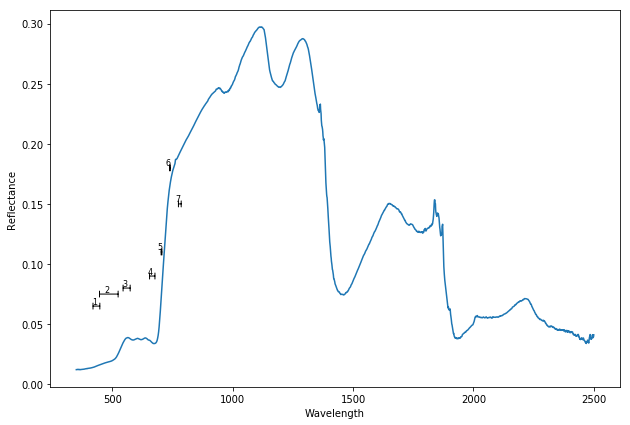

In [29]:
FIG_BandExtents.FIG_band_extents(all_refls, band_min, band_max, output, field_data, fignum)
fignum += 1

### Fudge GPS locations if none exist

In [30]:
ground_brdf_ls8 = FudgeGPS.fudge_gps(ground_brdf_ls8, Corners, RockWalk, StartCorner)
ground_brdf_s2a = FudgeGPS.fudge_gps(ground_brdf_s2a, Corners, RockWalk, StartCorner)
ground_brdf_s2b = FudgeGPS.fudge_gps(ground_brdf_s2b, Corners, RockWalk, StartCorner)

No good GPS Coordinates found, fudging...
No good GPS Coordinates found, fudging...
No good GPS Coordinates found, fudging...


### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [31]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ground_brdf_ls8)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

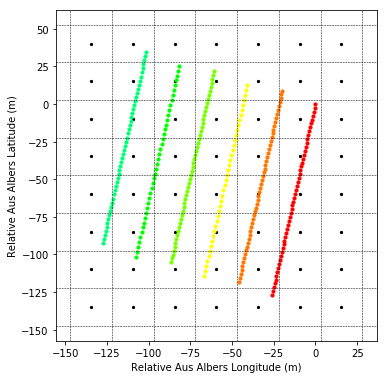

In [32]:
xloc, sxloc = FIG_SatFieldLocations.FIG_sat_field_locations(ground_brdf_ls8, ground_brdf_s2a, ls8_array, s2a_array, colpac, output, field_data, fignum)
fignum +=1

#ls_xloc, s2_xloc = FIG_SatFieldLocations.FIG_sat_field_locations(ls_ground_brdf, s2_ground_brdf, ls_sat_array, s2_sat_array, colpac, output, field_data, fignum)
#fignum +=1

### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [33]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ground_brdf_ls8, ground_brdf_s2a, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

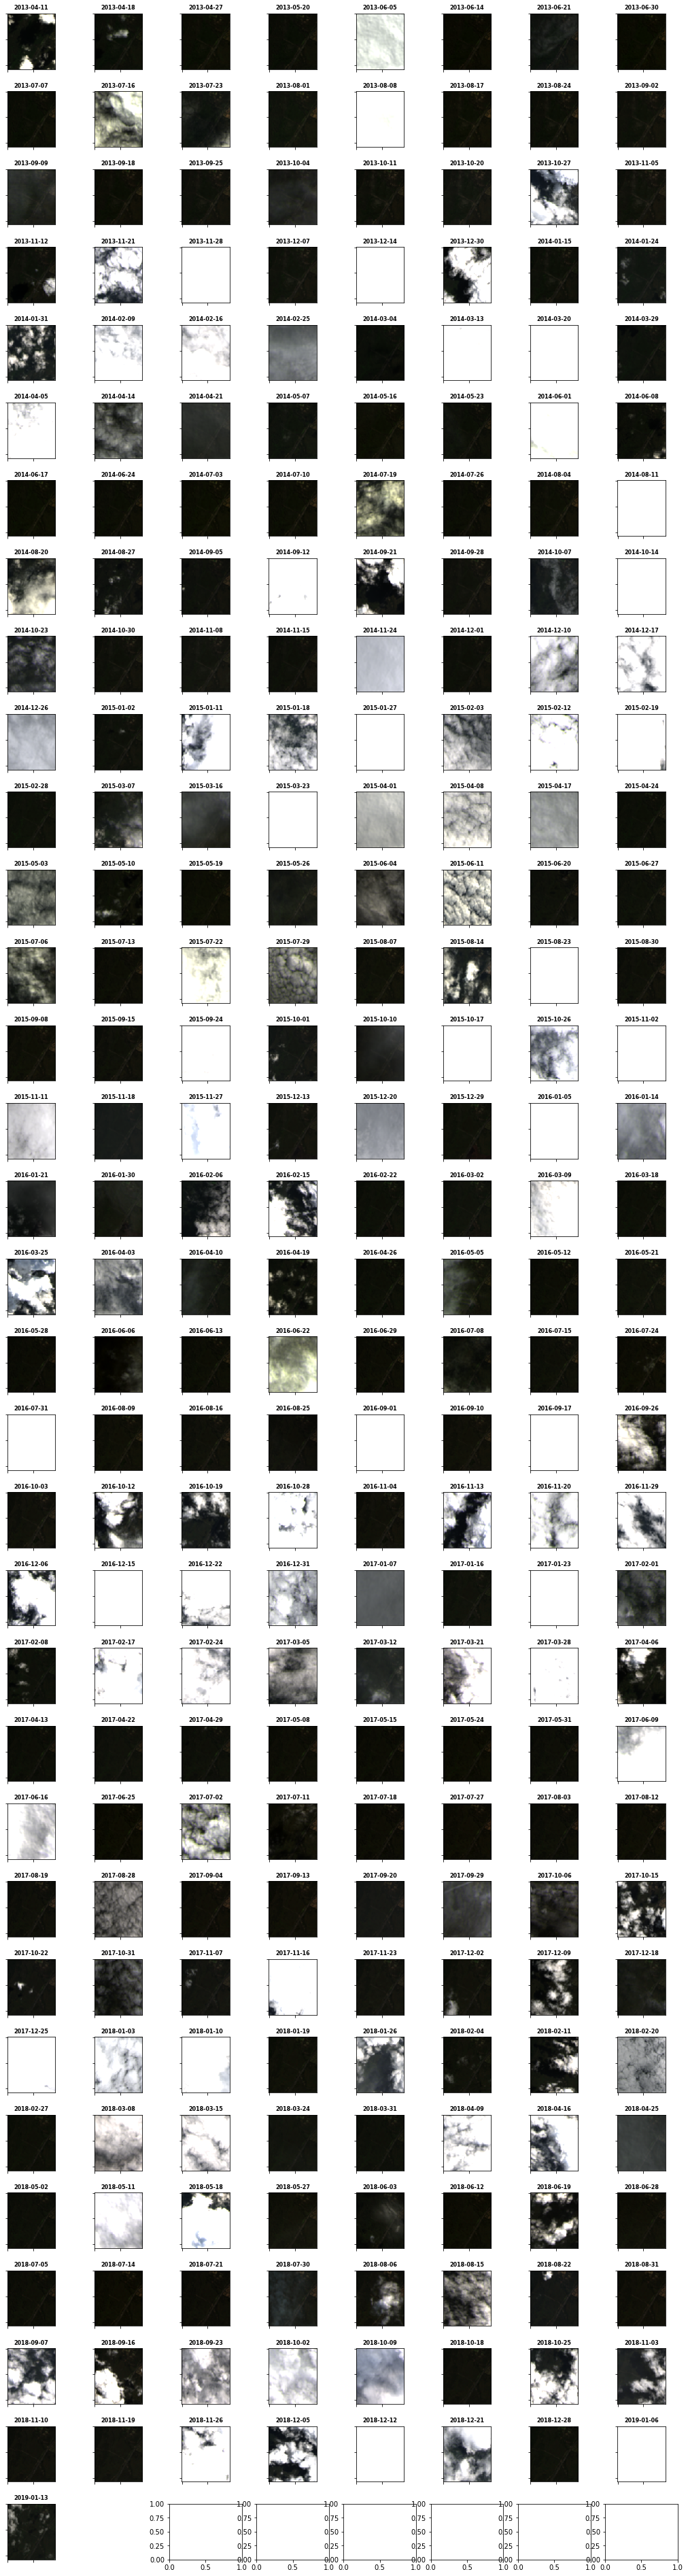

In [34]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

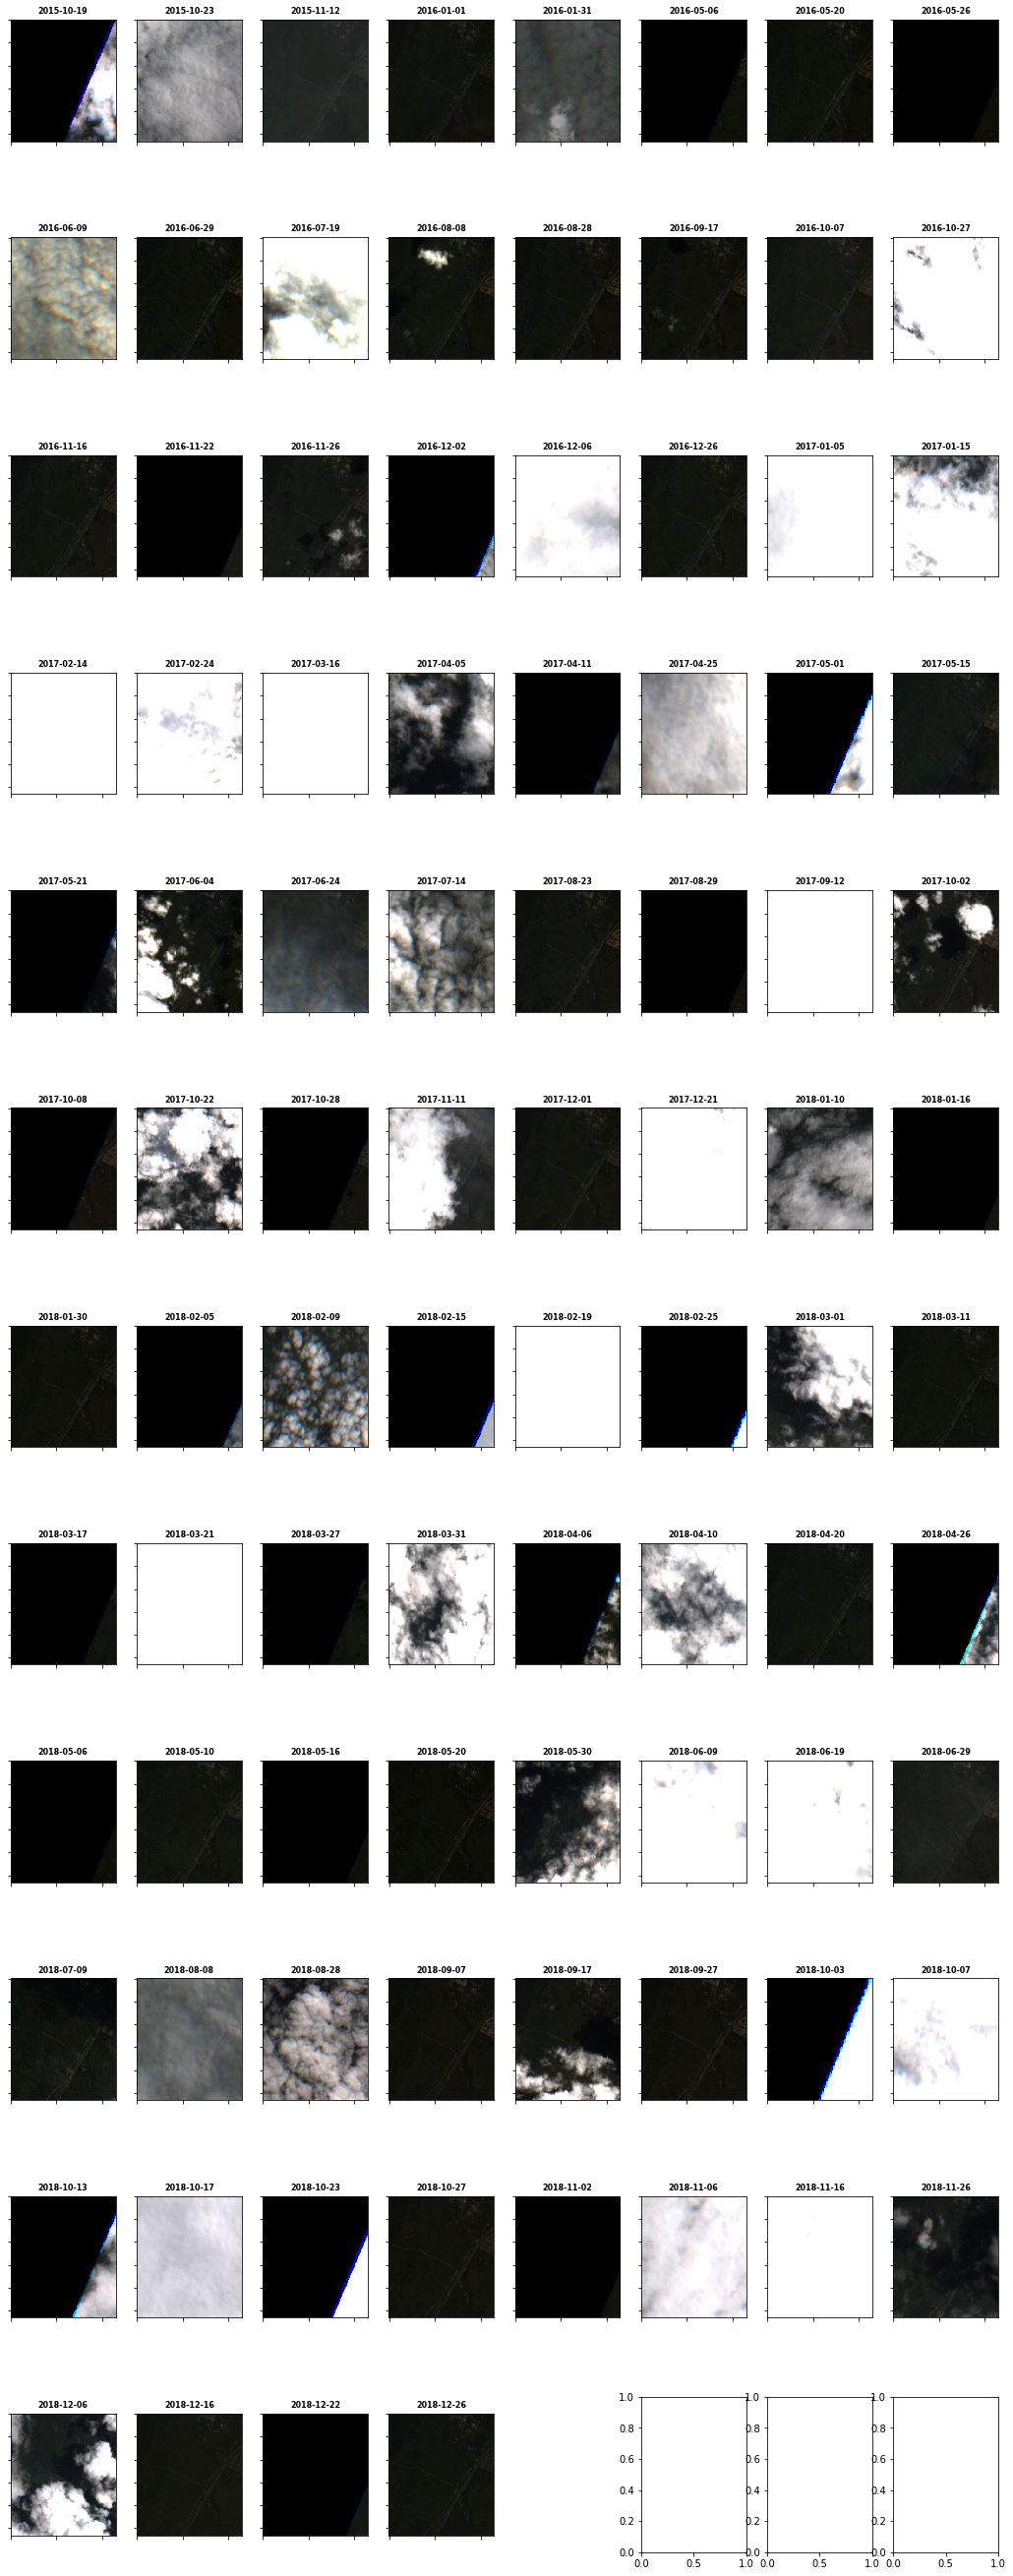

In [35]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

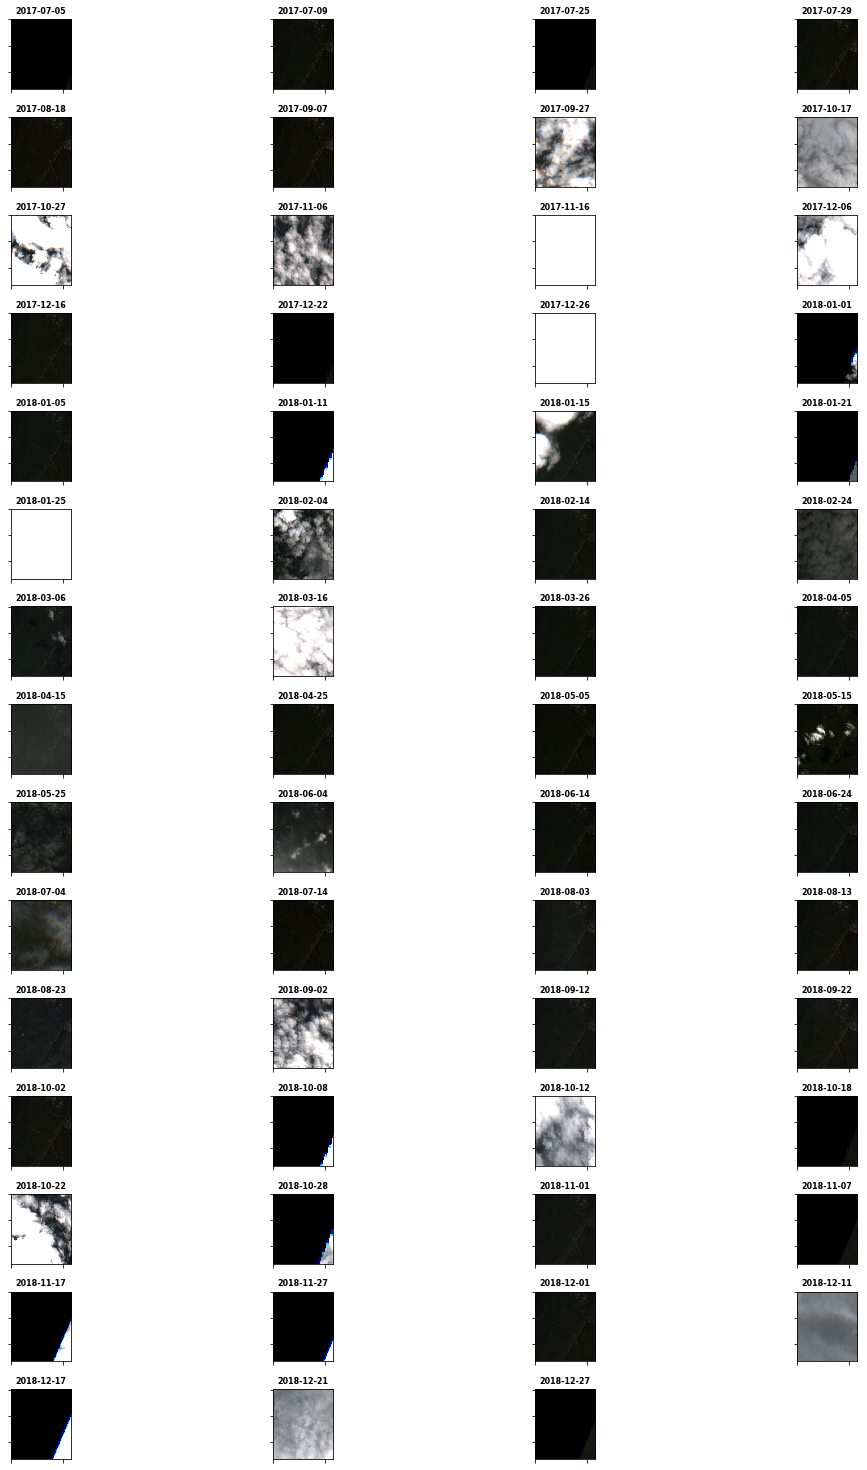

In [36]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

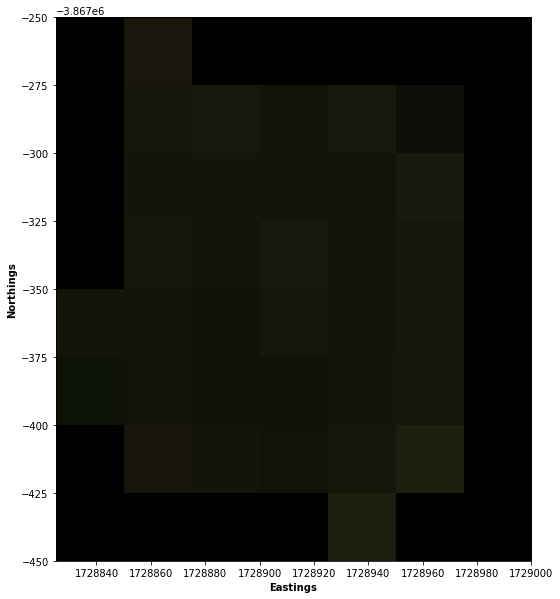

In [37]:
FIG_FieldRGB.FIG_field_RGB(field_array_ls8, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [47]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

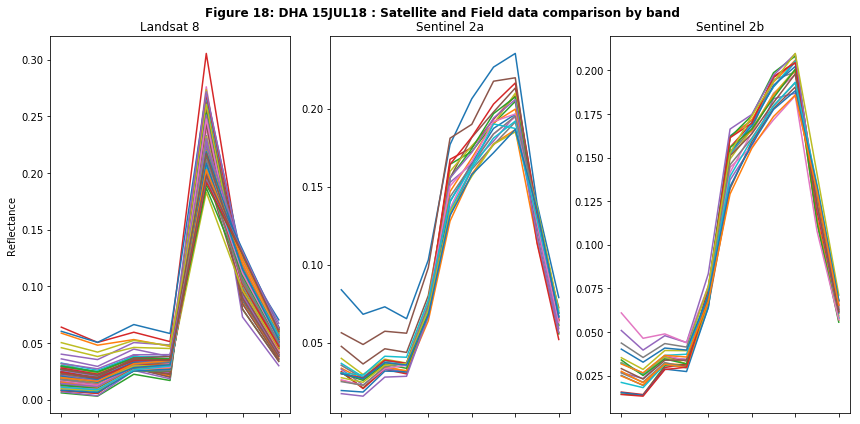

In [48]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

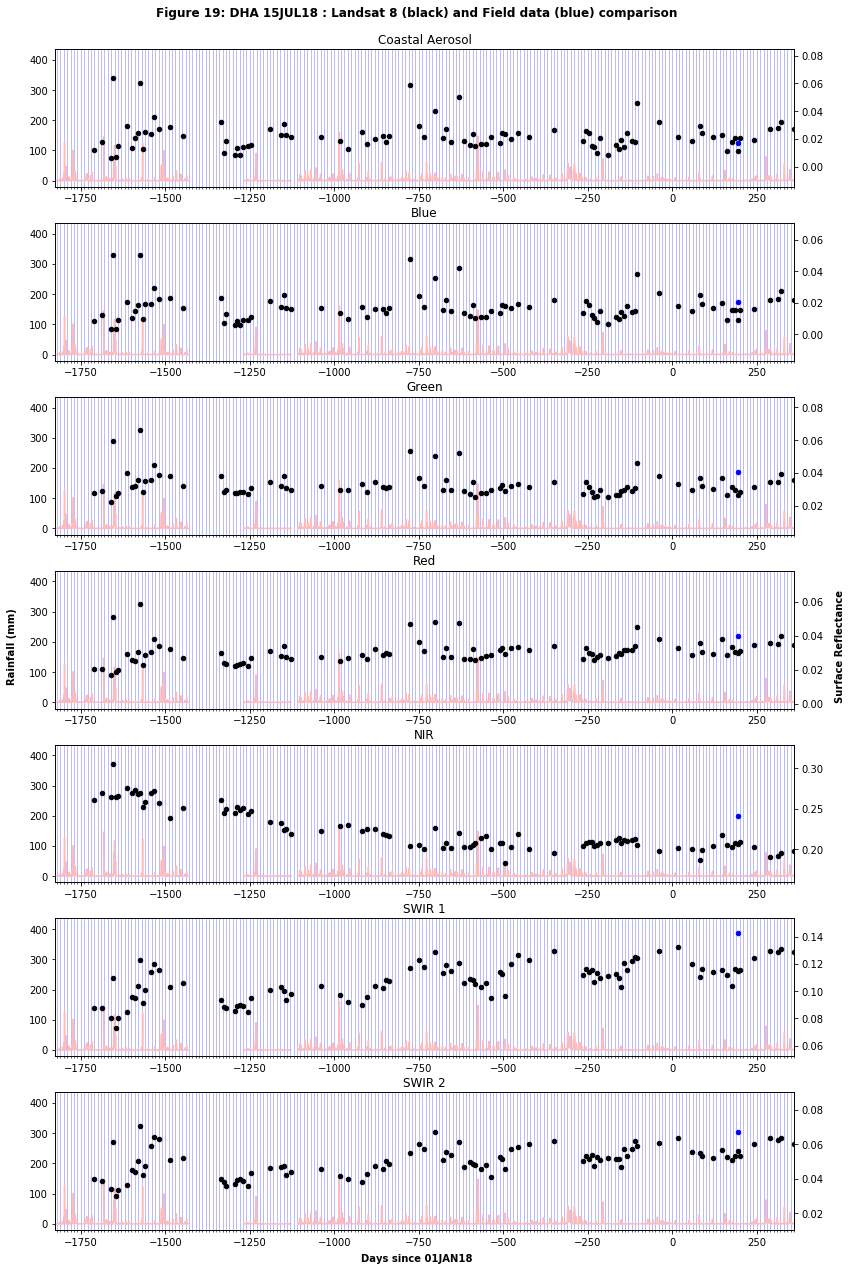

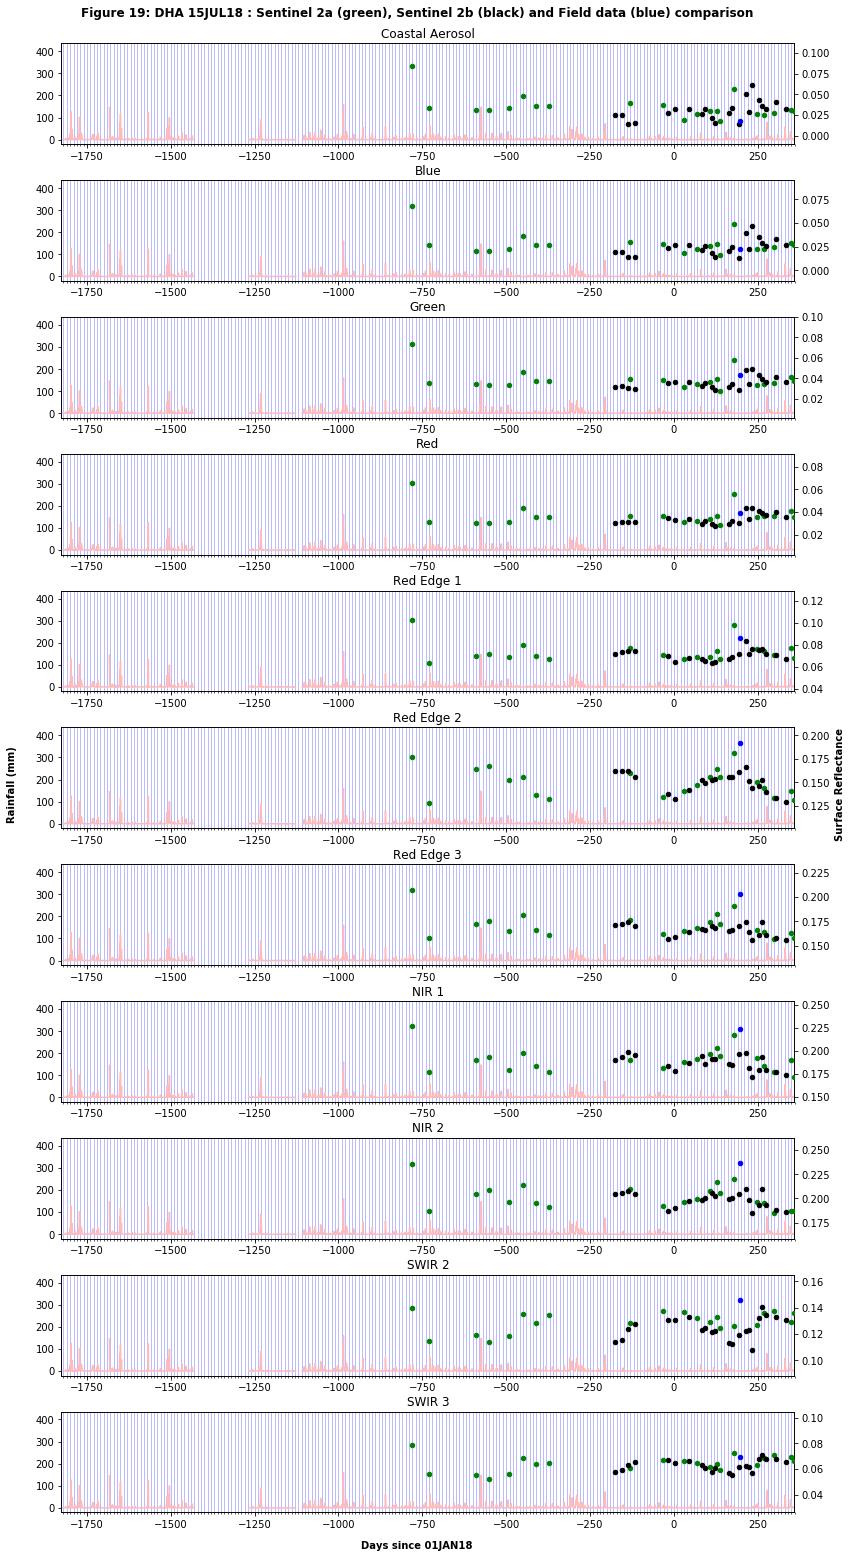

In [49]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [50]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 96
Landsat 8 Surface Reflectance for Band 1 is 0.021+/-0.016 (76.5%)
Landsat 8 Surface Reflectance for Band 2 is 0.016+/-0.013 (82.79%)
Landsat 8 Surface Reflectance for Band 3 is 0.032+/-0.011 (33.48%)
Landsat 8 Surface Reflectance for Band 4 is 0.03+/-0.01 (33.16%)
Landsat 8 Surface Reflectance for Band 5 is 0.227+/-0.011 (4.83%)
Landsat 8 Surface Reflectance for Band 6 is 0.106+/-0.011 (10.12%)
Landsat 8 Surface Reflectance for Band 7 is 0.049+/-0.009 (17.35%)

SENTINEL 2a: Number of adjacent overpasses: 21
Sentinel 2a Surface Reflectance for Band 1 is 0.03+/-0.009 (28.67%)
Sentinel 2a Surface Reflectance for Band 2 is 0.028+/-0.007 (23.34%)
Sentinel 2a Surface Reflectance for Band 3 is 0.04+/-0.005 (11.93%)
Sentinel 2a Surface Reflectance for Band 4 is 0.039+/-0.002 (6.06%)
Sentinel 2a Surface Reflectance for Band 5 is 0.076+/-0.001 (1.71%)
Sentinel 2a Surface Reflectance for Band 6 is 0.153+/-0.0 (0.33%)
Sentinel 2a Surface Reflectance for

In [42]:
#MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

In [43]:
#FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
#fignum+=1

In [44]:
#dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

## How long did this notebook take to run?

In [45]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:37:54 (h:m:s) to run
